In [1]:
import sys
sys.path.insert(0, '../src')
import numpy as np
import pickle

from frederickson import Frederickson
from modularmatrix import ModularMatrix
from integersolution import integer_solution
from fileio import parse_file

In [2]:
def max_length(tours, distance_matrix):
    """
    :returns a tuple (max_value, max_tour), where 'max_value' is the distance covered by the robot 
    that covers the maximum distance and 'max_tour' is the correspondent tour
    """
    max_tour = None
    max_value = 0
    for t in tours:
        t_length = distance_matrix.get_distance_along_path(t[0], t[-1], t)
        if t_length > max_value:
            max_value = t_length
            max_tour = t
    
    return (max_value, max_tour)

In [3]:
SOURCES_FOLDER = "../resources/environments/extracted/"

def get_building_matrix(building):
    filename = SOURCES_FOLDER + building + ".txt"
    _, matrix = parse_file(filename)
    return matrix

In [4]:
# to save variables on file along to way
# (Notice: the calculations are sometimes very long. We should minimize the risk of losing information)

SAVE_FOLDER = "./saved_results/comparison_v1/"

def save_variables(variables, filename):
    with open(SAVE_FOLDER + filename, 'wb') as f:
        pickle.dump(variables, f)
    
def load_variables(filename):
    with open(SAVE_FOLDER + filename, 'rb') as f:
        return pickle.load(f)

# Batch calculations for different scenarios

In [5]:
buildings = ["Franch1", "vipiteno1", "poli", "RomainRolland1", "st_josephs_cath_high_school"]

mp = [
    (2,2), (2,5), (2,10),
     (5,5), (5,10), (5,20),
     (20,20), (20,30), (20,50)
     ]

# mp = [(2,2), (5,5)]

#### DO NOT EXECUTE NEXT CELL
The computation is extremely slow and the results have been saved in files, so there is no need to recompute it. Execute the cell after to load the results from the files.

In [6]:
fred_max_len_list = {}
int_max_len_list = {}

for b in buildings:
    fred_max_len_list[b], int_max_len_list[b] = load_variables(b+".dump")

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

In [8]:
rows = len(buildings)

In [9]:
fig = {}
for b in buildings:
    fig[b]=plt.figure(figsize=(16, 3))

    plt.subplot(1,3,1)
    x=list(zip(*mp))[1][0:3]
    plt.plot(x, fred_max_len_list[b][0:3], '-o')
    plt.plot(x, int_max_len_list[b][0:3], '-o')
    plt.xlabel("p")
    plt.title("m=2")

    # the complete calculation for this case has not been executed
    if b == "st_josephs_cath_high_school":
        fig[b].savefig(SAVE_FOLDER + b +'.png')
        plt.close()
        continue
        
    plt.subplot(1,3,2)
    x=list(zip(*mp))[1][3:6]
    plt.plot(x, fred_max_len_list[b][3:6], '-o')
    plt.plot(x, int_max_len_list[b][3:6], '-o')
    plt.title("m=5")
    plt.xlabel("p")

    plt.subplot(1,3,3)
    x=list(zip(*mp))[1][6:9]
    plt.plot(x, fred_max_len_list[b][6:9], '-o')
    plt.plot(x, int_max_len_list[b][6:9], '-o')
    plt.title("m=20")
    plt.xlabel("p")

    fig[b].savefig(SAVE_FOLDER + b +'.png')
    plt.close() # prevent from showing plots 

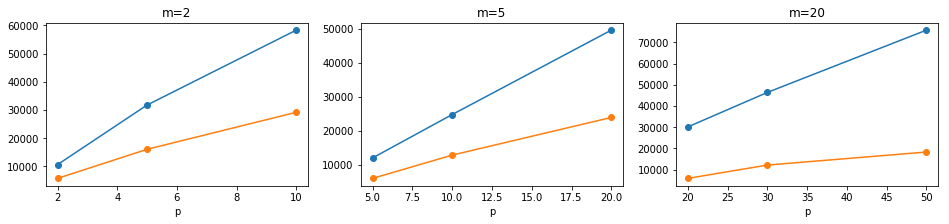

In [10]:
fig["Franch1"]

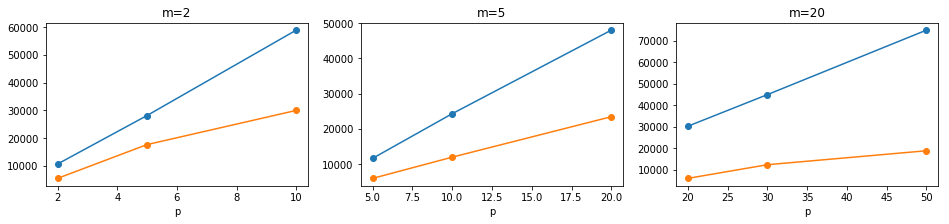

In [11]:
fig["poli"]

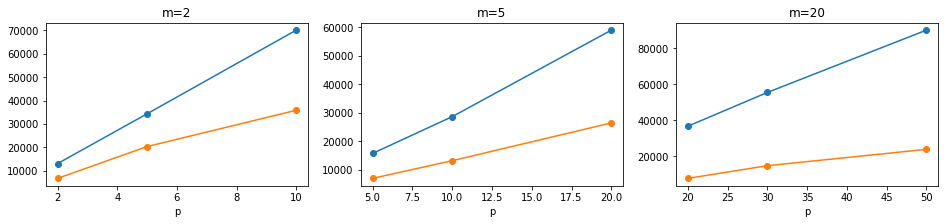

In [12]:
fig["RomainRolland1"]

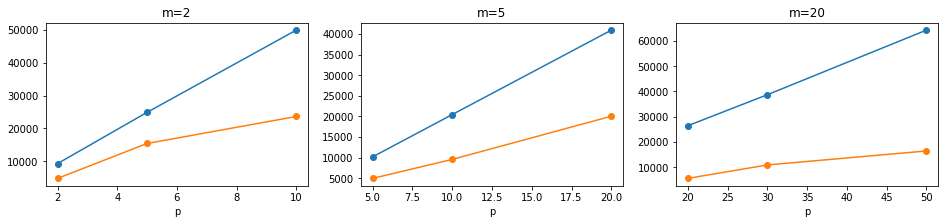

In [13]:
fig["vipiteno1"]

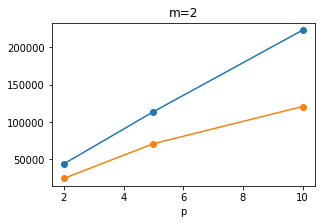

In [14]:
fig["st_josephs_cath_high_school"]